#### PCA applied to postions of face


In [202]:
from modules.loaders import LoadDataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [203]:
dataset = LoadDataset('positions_Faces.h5').load_h5()
type(dataset)

h5py._hl.files.File

In [204]:
with dataset as h5file:
    data_h5 = []
    labels = []
    for face in h5file.keys():
        positions = h5file[face]['positions'][:]
        data_h5.append(positions)
        # print(positions.shape)
        labels.extend([face]*positions.shape[1]) #* extend is used to add the elements of the list, not the list itself  

labels = np.array(labels)
labels_letter = np.reshape(labels, (labels.shape[0], ))
labels_letter.shape


(6165,)

In [205]:
for i, id in enumerate(data_h5):
    print('Data shape',i, id.shape)

Data shape 0 (936, 1233)
Data shape 1 (936, 1233)
Data shape 2 (936, 1233)
Data shape 3 (936, 1233)
Data shape 4 (936, 1233)


In [206]:
labels_letter

array(['Enojo', 'Enojo', 'Enojo', ..., 'Triste', 'Triste', 'Triste'],
      dtype='<U8')

In [207]:
data = np.concatenate(data_h5,axis=1)
data.shape

(936, 6165)

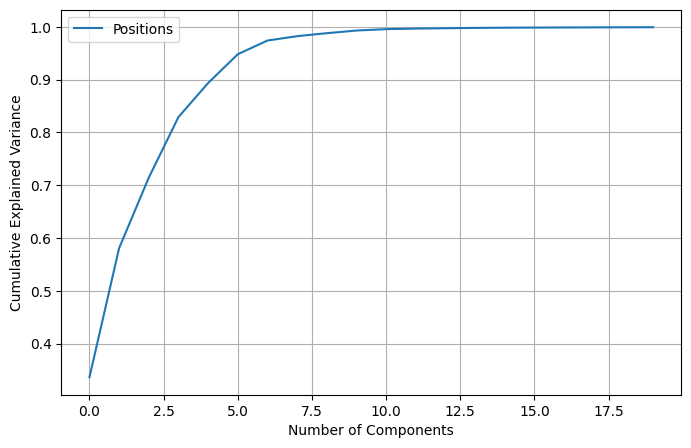

In [208]:
from sklearn.decomposition import PCA

### Reduce dimensions of positions (936)
pca_positions = PCA().fit(data.T) # Fit PCA to data
# print("Explained variance (positions):", pca_positions.explained_variance_ratio_)

# Plot cumulative explained variance (
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_positions.explained_variance_ratio_[0:20]), label='Positions')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()


In [209]:
pca_positions_sum = np.cumsum(pca_positions.explained_variance_ratio_)


In [210]:
np.where((pca_positions_sum > 0.95) & (pca_positions_sum < 1))

### 

(array([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
         19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
        175, 176, 177, 178, 179, 180, 181, 182, 183

###  If the cumulative explained variance is close to 1.0 from the first few principal components (i.e., a small number of components explain almost all the variance), this indicates that your data has high redundancy or that the positions are highly correlated with each other. This is an interesting scenario and has several implications

In [211]:
from sklearn.decomposition import PCA

# Fit PCA and reduce the dimensionality
pca = PCA(n_components=15)
reduced_data = pca.fit_transform(data.T)

# Recover the original data (or an approximation) using the same PCA object
recovered_data = pca.inverse_transform(reduced_data)

# Print the shape of the reduced and recovered data
print(f"Shape of reduced data: {reduced_data.shape}")
print(f"Shape of recovered data: {recovered_data.shape}")


Shape of reduced data: (6165, 15)
Shape of recovered data: (6165, 936)


In [212]:
# import h5py


# output_file = f'..{os.path.sep}..{os.path.sep}data{os.path.sep}features{os.path.sep}positions_Faces_PCA.h5'

# # Create an HDF5 file and group data by labels
# with h5py.File(output_file, "w") as h5file:
#     # Iterate over the labels and the data
#     for i, label in enumerate(np.unique(labels_letter)):
#         # Filter the positions corresponding to the current label
#         group_data = reduced_data[labels_letter == label]
        
#         # Transpose the group_data before saving
#         group_data_transposed = group_data.T
        
#         # Create a group with the name of the label
#         grp = h5file.create_group(str(label))
        
#         # Create a dataset inside the group for the transposed positions
#         grp.create_dataset('positions', data=group_data_transposed)

#     print(f"Data successfully saved to {output_file}")


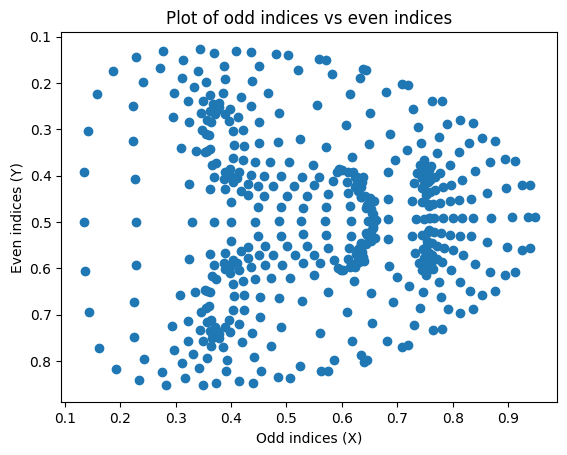

In [213]:
# Plot odd indices in x and even indices in y
plt.plot(data.T[1, 1::2], data.T[1, 0::2], 'o')  # Odd indices (x) and even indices (y)
plt.gca().invert_yaxis()
# Add labels and title for better clarity
plt.xlabel("Odd indices (X)")
plt.ylabel("Even indices (Y)")
plt.title("Plot of odd indices vs even indices")
plt.show()


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu dataset con forma (936, 6165)
# donde las filas son las posiciones (936) y las columnas son las muestras (6165)

# 1. Aplica PCA a los datos
pca = PCA(n_components=15)  # Ajusta el número de componentes según lo que necesites
reduced_data = pca.fit_transform(data.T)

# 2. Obtener las posiciones más significativas
# pca.components_ contiene las contribuciones de cada característica a cada componente principal
# Cada fila de pca.components_ corresponde a una componente principal y cada columna a una posición.

# Ahora, vamos a obtener las posiciones que más contribuyen a las primeras 15 componentes
# Para esto, tomamos la magnitud de las contribuciones (valores absolutos)
important_positions = np.argsort(np.abs(pca.components_), axis=1)

# Si solo te interesan las primeras 'n' posiciones más relevantes, puedes ajustar esto:
n = 100  # Número de posiciones más relevantes a seleccionar (ajústalo como quieras)
top_positions = important_positions[:, :n]

print(top_positions.shape)  # Debería ser (15, n)
# 4. Puedes obtener las posiciones más importantes para cada componente principal:
for i in range(15):  # Para cada componente
    print(f"Most relevant positions for component {i + 1}: {top_positions[i]}")
    
significant_positions = top_positions[14]


(15, 100)
Most relevant positions for component 1: [165 251  68 337 167 169 171  13 173 283  17 175 677 395  77 485 391  19
  11  89   9 483   7 732   3  91 103 145  39 189 393  41  75 403   5 675
 245 329 477 195 303   1 335 835 357 703  23 673 741 199 387 736  25 839
 709 359 163 417 571 497  27 121 473 377 349 563 361  21 491 475 549 925
 551 269 363 479 923 931 454 343  83 111 827 297 894 441 825  29 929 489
 501 215  31 917 379 595  33 799 177  37]
Most relevant positions for component 2: [282  20 250 302  16  18 336  12 304 394  28  36   4 350 400  30  26 328
 398  34 390  32  24  22   0 188  10  38   2   8 484  88 164 482   6 102
  76  90  40 476 392 740 174 244 144 708 172  74 194 624 924 170 334 922
 168 166 198 496 386 548 135 162 219 474 207 536 478 702 838 634 500  21
 562 677 916 120 595 550 109 402 604 632 472 665 348  82 376 356 534 440
 268 834 652 490 630 158 569  43 209 786]
Most relevant positions for component 3: [399 100 401 351 477 387  41  37  91 736 245 305 195 

array([ 12, 414, 719, 897, 903, 708, 740, 400, 699,  26, 196,  24, 534,
       901, 505, 899, 328, 694,   0, 463,  74, 480, 850, 654, 461, 920,
       849, 529,   4, 832, 241, 394, 336,  69, 194, 717,  22, 261, 201,
       239, 659, 387,  45, 861, 188, 334, 743, 390, 573, 523, 198, 457,
       924, 626, 610, 452, 223, 652, 922, 410, 398, 407,  16,  36, 459,
       852, 513, 905, 892, 150, 285, 337, 676,  53, 916, 465, 729, 548,
       896, 555, 588, 330, 500, 656, 812, 786, 580,  63, 507, 604, 552,
        18, 379, 538, 120, 711, 237, 255, 282, 681], dtype=int64)

In [228]:
# Dividir en posiciones pares e impares basados en el valor
even_positions = significant_positions[significant_positions % 2 == 0]  # Valores pares
odd_positions = significant_positions[significant_positions % 2 == 1]   # Valores impares

# Mostrar resultados
print("Even positions:", even_positions, even_positions.shape)
print("Odd positions:", odd_positions, odd_positions.shape)

Even positions: [ 12 414 708 740 400  26 196  24 534 328 694   0  74 480 850 654 920   4
 832 394 336 194  22 188 334 390 198 924 626 610 452 652 922 410 398  16
  36 852 892 150 676 916 548 896 588 330 500 656 812 786 580 604 552  18
 538 120 282] (57,)
Odd positions: [719 897 903 699 901 505 899 463 461 849 529 241  69 717 261 201 239 659
 387  45 861 743 573 523 457 223 407 459 513 905 285 337  53 465 729 555
  63 507 379 711 237 255 681] (43,)


ValueError: x and y must have same first dimension, but have shapes (43,) and (57,)

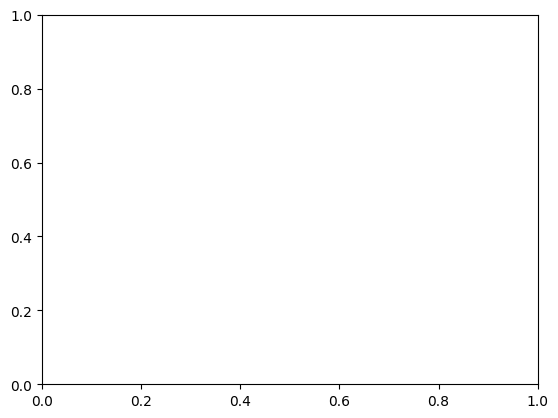

In [227]:
# Plot odd indices in x and even indices in y
plt.plot(odd_positions, even_positions, 'o')  # Odd indices (x) and even indices (y)
plt.gca().invert_yaxis()
# Add labels and title for better clarity
plt.xlabel("Odd indices (X)")
plt.ylabel("Even indices (Y)")
plt.title("Plot of odd indices vs even indices")
plt.show()